In [23]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

[[-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 ...
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]] [[-30.  -30.  -30.  ... -30.  -30.  -30. ]
 [-29.5 -29.5 -29.5 ... -29.5 -29.5 -29.5]
 [-29.  -29.  -29.  ... -29.  -29.  -29. ]
 ...
 [ 28.5  28.5  28.5 ...  28.5  28.5  28.5]
 [ 29.   29.   29.  ...  29.   29.   29. ]
 [ 29.5  29.5  29.5 ...  29.5  29.5  29.5]] [[-0.00982064 -0.0113957  -0.01319036 ... -0.01522953 -0.01319036
  -0.0113957 ]
 [-0.0113957  -0.01322338 -0.01530587 ... -0.01767209 -0.01530587
  -0.01322338]
 [-0.01319036 -0.01530587 -0.01771632 ... -0.02045518 -0.01771632
  -0.01530587]
 ...
 [-0.01200234 -0.01414685 -0.01660867 ...  0.02918791  0.03019517
   0.03085725]
 [-0.01097235 -0.01288301 -0.01507265 ...  0.01583738  0.01709512
   0.01804782]
 [-0.00988645 -0.01157475 -0.01350698 ...  0.00702321  0.00838

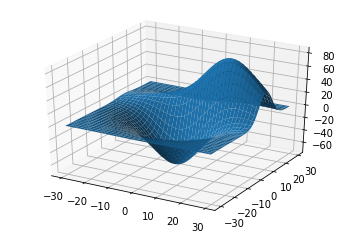

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_surface(X, Y, Z)

print(X, Y, Z)

plt.show()

In [1]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle

In [2]:
X = [[0, 0], [2, 1], [5, 4]]
y = [0, 2, 2]

In [3]:
clf = SGDClassifier(penalty="l2", max_iter=100)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [4]:
clf.predict([[4,3]])

array([2])

In [5]:
print(clf.predict([[4, 3]]))

[2]


In [6]:
print(clf.coef_)
print(clf.intercept_)

[[48.87585533 39.10068426]]
[-9.95012965]


In [7]:
from sklearn.linear_model import SGDRegressor

In [8]:
X = [[0, 0], [2, 1], [5, 4]]
y = [0, 2, 2]

In [9]:
reg = SGDRegressor( penalty="l2", max_iter=10000)
reg.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [10]:
reg.predict([[4,3]])

array([1.87679195])

In [11]:
print(reg.predict([[4,3]]))

[1.87679195]


In [15]:
print(reg.coef_)
print(reg.intercept_)

[0.32071854 0.14491044]
[0.15918647]


增量学习

In [16]:
from random import randint

In [17]:
reg2 = SGDRegressor(loss="squared_loss", penalty="none", tol=1e-15)

In [18]:
X=np.linspace(0, 1, 50)
y = X*2 #+ np.random.normal(0, 0.15, len(X))

In [19]:
X=X.reshape(-1, 1)
print(X.shape, X[0:1], y[0:1])

(50, 1) [[0.]] [0.]


In [20]:
reg2.partial_fit(X[0:1], y[0:1])
for i in range(10000):
    # idx = randint(0, len(y)-1)
    # reg2.partial_fit(X[idx:idx+1], y[idx: idx+1], np.ones(1)*0.02)
    i = randint(0, 9)
    reg2.partial_fit(X[5*i: 5*(i+1)], y[5*i: 5*(i+1)])

In [21]:
print(reg2.coef_)
print(reg2.intercept_)

[1.92544951]
[0.0395407]


In [22]:
print(reg2.predict([[0.6]]))

[1.1948104]
